<a href="https://colab.research.google.com/github/nathalylorena/Data-mining/blob/main/dataset_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

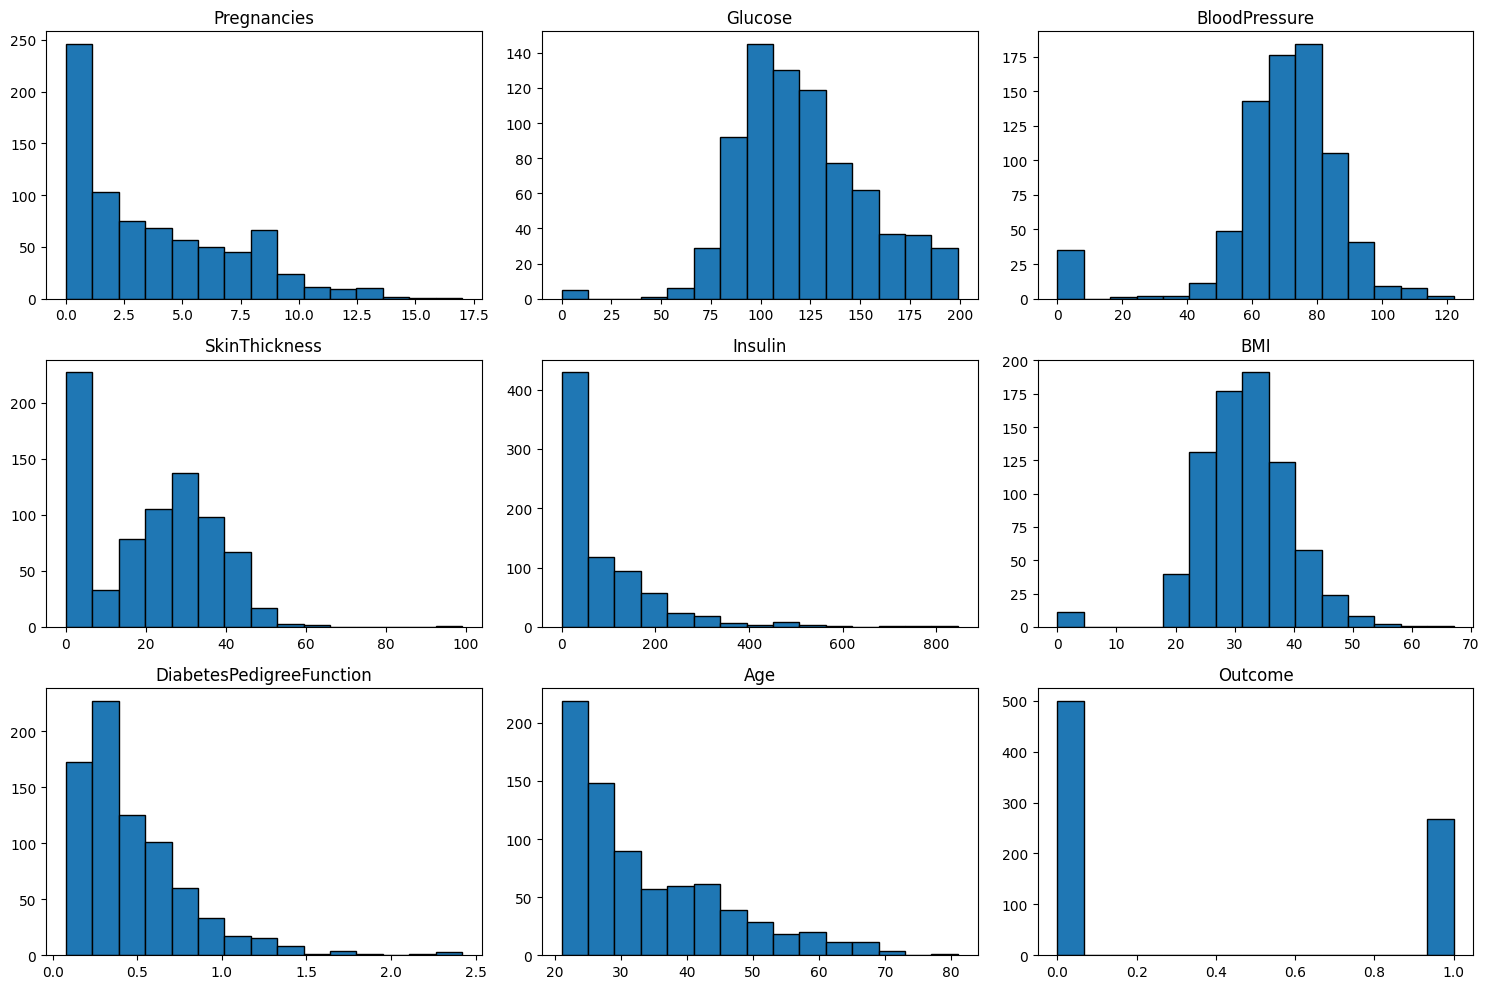

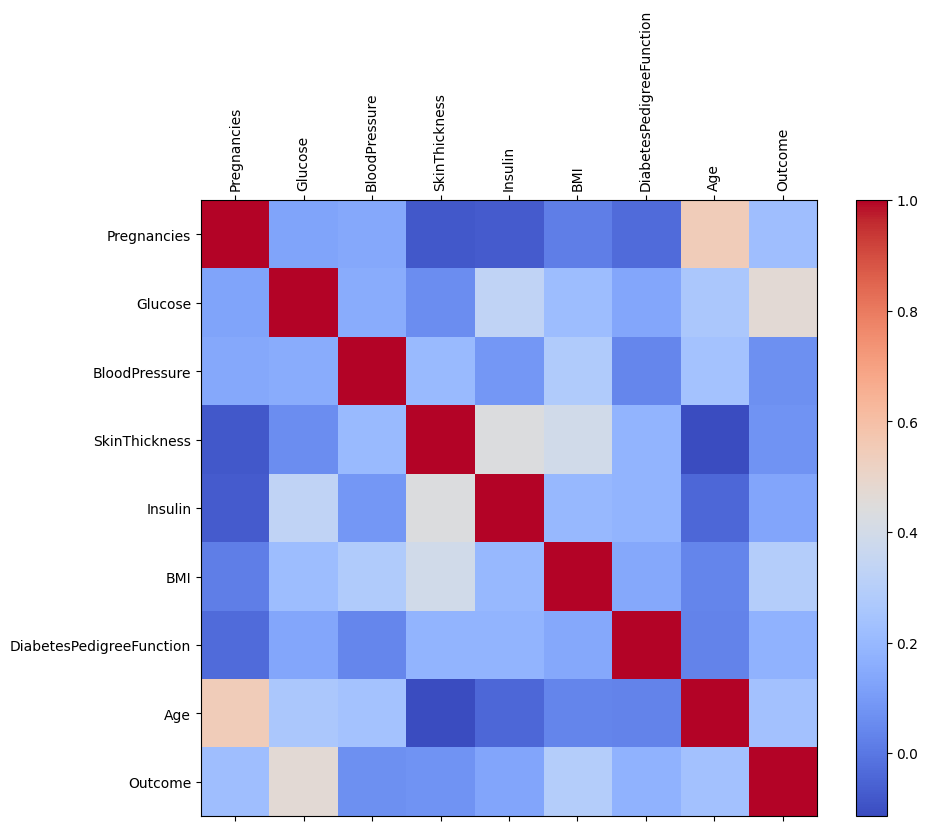

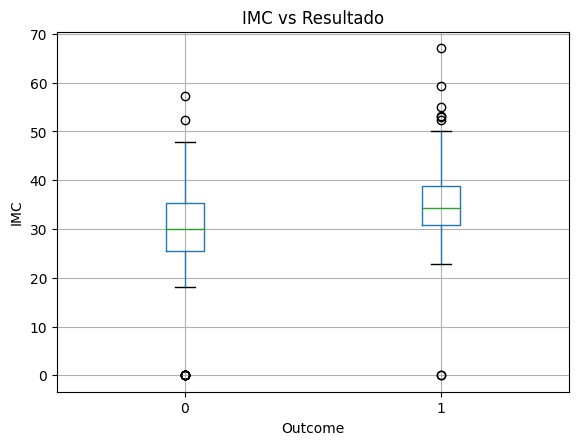

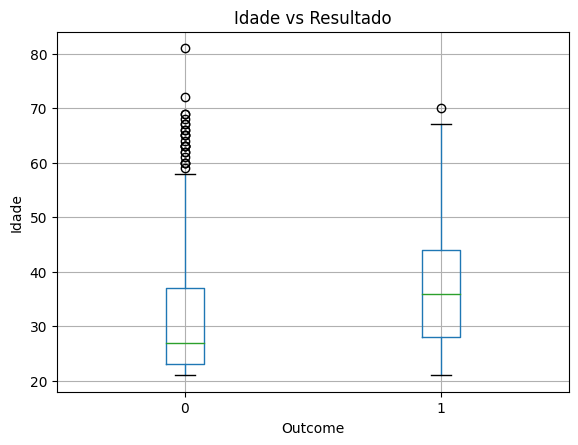

Erro Quadrático Médio: 0.17104527280850104
R-quadrado: 0.25500281176741757


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklean.metrics import mean_squared_error, r2_score

# Importando o conjunto de dados
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)

# Exibindo as primeiras linhas do conjunto de dados
print(df.head())

# Informações básicas sobre o conjunto de dados
print(df.info())

# Estatísticas descritivas
print(df.describe())

# Configuração dos subplots para histogramas
fig, eixos = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Lista de colunas
colunas = df.columns

# Loop para criar histogramas
for i, ax in enumerate(eixos.flatten()):
    if i < len(colunas):
        ax.hist(df[colunas[i]], bins=15, edgecolor='k')
        ax.set_title(colunas[i])

plt.tight_layout()
plt.show()

# Matriz de correlação
matriz_corr = df.corr()

# Heatmap da matriz de correlação
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(matriz_corr, cmap='coolwarm')

# Adicionando barras de cores e rótulos
plt.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
plt.xticks(ticks, df.columns, rotation=90)
plt.yticks(ticks, df.columns)

plt.show()

# Análise da relação entre IMC e Resultado (Outcome)
fig, ax = plt.subplots()
df.boxplot(column='BMI', by='Outcome', ax=ax)
ax.set_title('IMC vs Resultado')
ax.set_ylabel('IMC')
plt.suptitle('')  # Remove o título automático do matplotlib
plt.show()

# Análise da relação entre Idade e Resultado (Outcome)
fig, ax = plt.subplots()
df.boxplot(column='Age', by='Outcome', ax=ax)
ax.set_title('Idade vs Resultado')
ax.set_ylabel('Idade')
plt.suptitle('')  # Remove o título automático do matplotlib
plt.show()

# Seleção de variáveis independentes (X) e dependente (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Divisão dos dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

# Avaliação do modelo
mse = mean_squared_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print(f'Erro Quadrático Médio: {mse}')
print(f'R-quadrado: {r2}')